## Random Forest

#### Load data and libraries

In [ ]:
# TUNEADO DE MTRY CON CARET

library(caret)
install.packages("e1071")
install.packages("randomForest")
library(randomForest)

options(warn=-1)

In [ ]:
source ("cruzadas avnnet y log binaria.R")
source ("cruzada arbolbin.R")
source ("cruzada rf binaria.R")

In [6]:

load("data.Rda")
head(data)

,age,yronset,sex_m,premi_nk,premi_y,smstat_n,smstat_nk,smstat_x,diabetes_nk,diabetes_y,highbp_nk,highbp_y,hichol_nk,hichol_y,angina_nk,angina_y,stroke_nk,stroke_y,hosp_y,outcome
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,0.45582598,-1.465502,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,No
2,-0.05347366,-1.465502,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,No
3,1.09245054,-1.465502,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,No
4,-1.70869752,-1.465502,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No
5,-1.45404770,-1.465502,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,Yes
6,-0.56277331,-1.465502,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,No


### Primer set de variables, set básico

El primer set de variables o set básico es el que se ha estado usando desde el inicio, son 9 variables:

hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,

#### Tuneado ntree

El tuneado ntree ya ha sido realizado en el archivo bagging con el resultado de ntree=3000 

#### Tuneado RandomForest con caret

In [22]:
set.seed(40)
rfgrid<-expand.grid(mtry=c(3,4,5,6,7,8,9))

control<-trainControl(method = "cv",number=10,savePredictions = "all",
 classProbs=TRUE) 

rf12<- train(factor(outcome)~
           hosp_y+highbp_nk+age+angina_nk+angina_y+smstat_nk+yronset+stroke_y+stroke_nk,
           data=data,
           method="rf",
           trControl=control,
           tuneGrid=rfgrid,
           linout = FALSE,
           ntree=3000,
           nodesize=10,
           replace=TRUE,
           importance=TRUE)


In [23]:
rf12

Random Forest 

6367 samples
   9 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5731, 5730, 5730, 5730, 5730, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  3     0.8774915  0.7463748
  4     0.8757644  0.7430502
  5     0.8740370  0.7398571
  6     0.8741945  0.7403730
  7     0.8716800  0.7353829
  8     0.8696390  0.7314464
  9     0.8685376  0.7293576

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

Usaremos el parámetro mtry = 3 identificado como el que mejor Accuracy presenta.

#### Tuneado sampsize 

Ahora se va a tunear sampsize con Caret, mediante validación cruzada en diferentes tamaños muestrales, de la misma forma que se a realizado en el caso de Baggin.

In [26]:
source ("cruzada rf binaria.R")

In [27]:
#Tuneado con validación cruzada repetida el tamaño de muestra sampsize en bagging

medias11<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=50)

  medias11$modelo="rforest50"



  mtry  Accuracy     Kappa AccuracySD   KappaSD
1    3 0.8791579 0.7497474 0.01102854 0.0233607


In [28]:

medias12<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=100)

  medias12$modelo="rforest100"



  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8793466 0.7502229  0.0112232 0.02376532


In [29]:

medias13<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150)

  medias13$modelo="rforest150"


  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8794644 0.7504908 0.01110852 0.02352968


In [30]:

medias14<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=500)

  medias14$modelo="rforest500"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8790636 0.7496477 0.01117231 0.02363073


In [31]:

medias15<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=1000)

  medias15$modelo="rforest1000"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8790633 0.7496239 0.01119241 0.02365906


In [32]:

medias16<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=1500)

  medias16$modelo="rforest1500"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8787729 0.7489815  0.0111231 0.02352937


In [33]:

medias17<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=2000)

  medias17$modelo="rforest2000"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8784274 0.7482596  0.0112422 0.02377908


In [34]:
set.seed(40)
medias18<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE)

  medias18$modelo="rforest_base"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8779487 0.7472754 0.01145617 0.02423233


In [35]:
union1<-rbind(medias11,medias12,medias13,medias14,medias15,medias16,medias17,medias18)


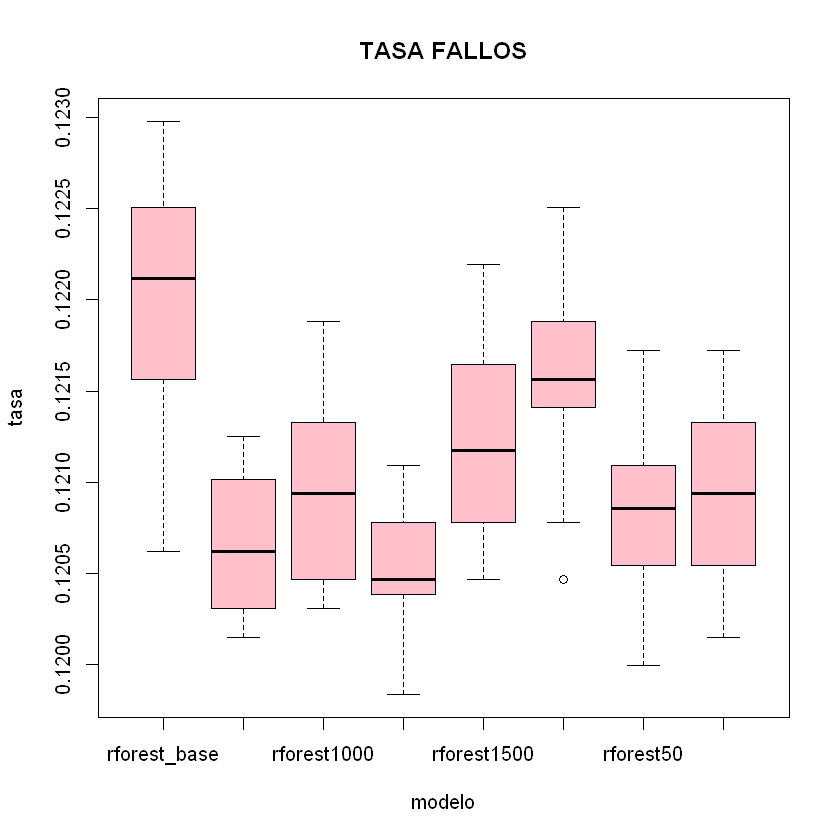

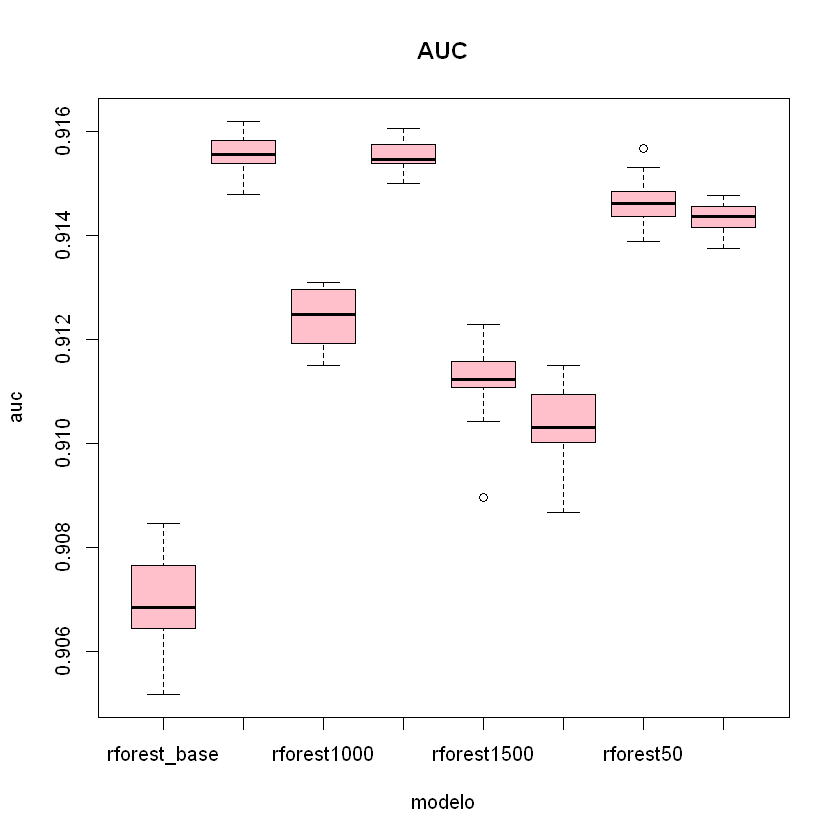

In [37]:
par(cex.axis=1.0)
boxplot(data=union1,tasa~modelo,main="TASA FALLOS",col="pink")
boxplot(data=union1,auc~modelo,main="AUC",col="pink")

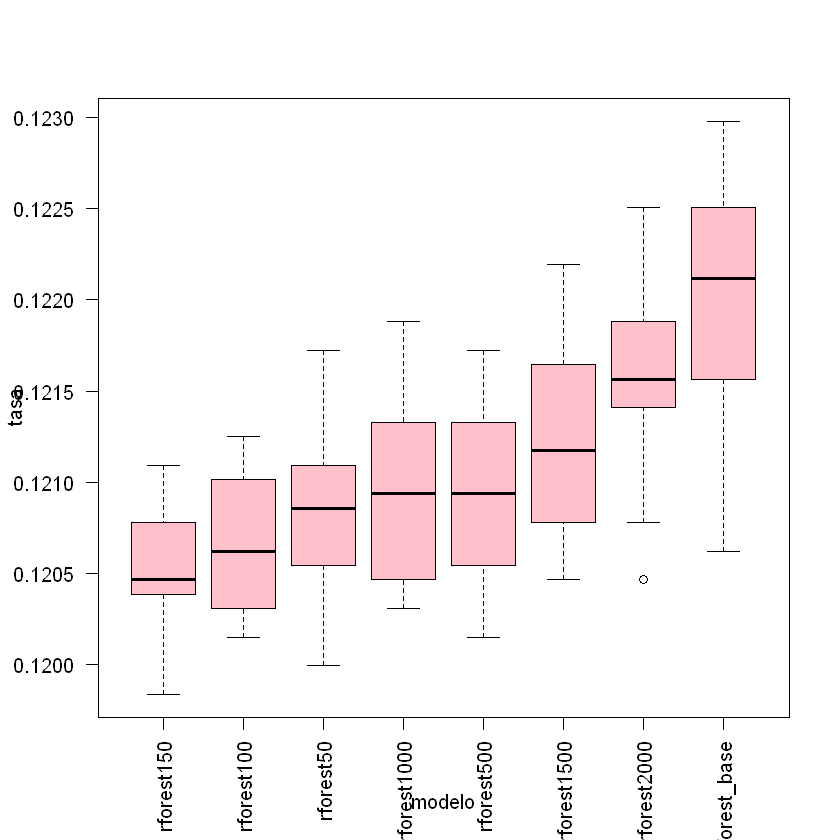

In [38]:
uni<-union1
uni$modelo<- with(uni, reorder(modelo,tasa,mean))
par(cex.axis=1, las=2)
boxplot(data=uni,tasa~modelo,col="pink")

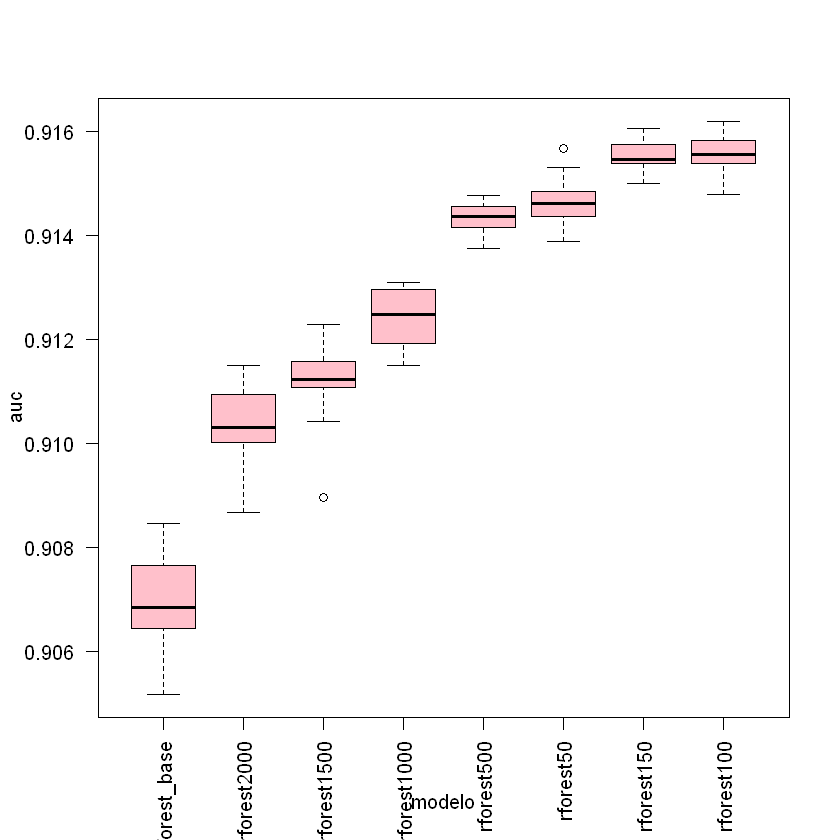

In [39]:
uni<-union1
uni$modelo<- with(uni, reorder(modelo,auc,mean))
par(cex.axis=1, las=2)
boxplot(data=uni,auc~modelo,col="pink")

Se entiende que el valor de sampsize de 150 es más correcto, dada la divergencia entre AUC y tasa de fallos, que no es demasiada pues tenemos una buena tasa de fallos y un área bajo la curva con menos variabilidad en el caso de 150 y por eso se escoge este valor.

### Importancia de las variables

In [24]:
# IMPORTANCIA DE VARIABLES

final<-rf12$finalModel

tabla<-as.data.frame(importance(final))
tabla<-tabla[order(-tabla$MeanDecreaseAccuracy),]
tabla



,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
,<dbl>,<dbl>,<dbl>,<dbl>
hosp_y,528.14214188,475.606377,528.41894,1395.17480
highbp_nk,87.48443940,-8.442841,86.64072,159.75396
smstat_nk,81.96504480,-5.961438,85.02637,61.42748
stroke_nk,54.10897532,26.307999,64.35342,153.81570
angina_nk,57.40451498,22.376824,53.46116,95.81550
stroke_y,14.00289005,39.168382,37.90197,20.58485
angina_y,12.64580501,15.869654,21.37268,18.74907
yronset,18.71036490,-3.001812,11.76591,34.04508
age,0.07091296,14.663893,11.15951,71.83834


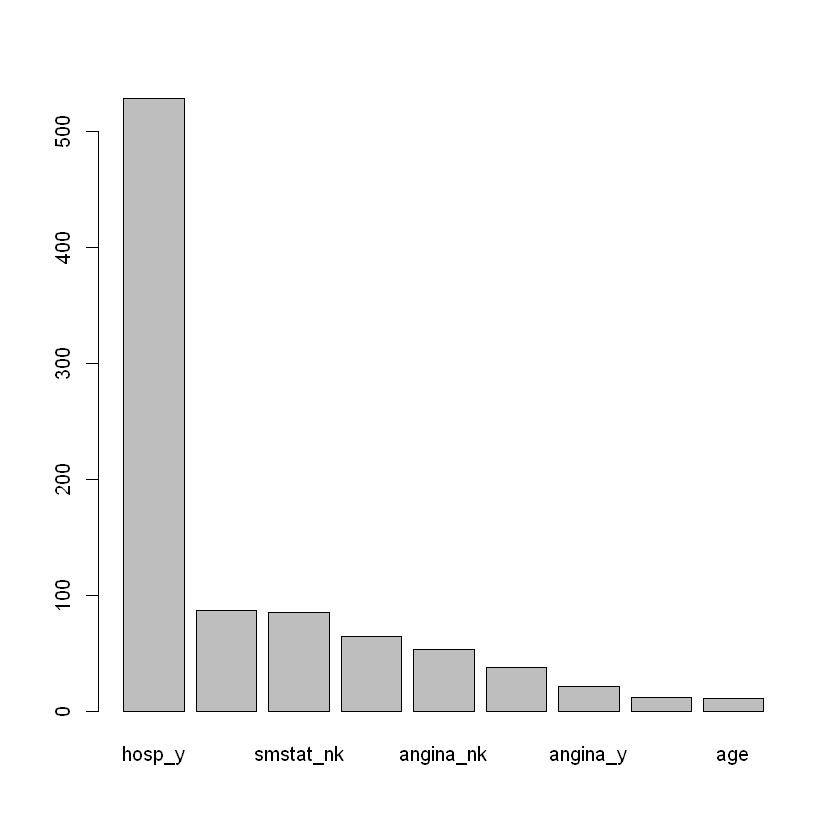

In [25]:
barplot(tabla$MeanDecreaseAccuracy,names.arg=rownames(tabla))


Se puede observar que el dataset está desbalanceado, pues la variable hosp_y tiene demasiada influencia y acaba por dominar los resultados, parece no ofrecer demasiada dispersión. 
Vamos a tantear otras ocpiones planteando otro set de variables, nos quedamos con las 6 mejores variables para un posterior estudio de los valores de tuneado de los parámetros.

hosp_y+highbp_nk+angina_nk+smstat_nk+stroke_y+stroke_nk

### Segundo set de variables

#### Tuneado RandomForest con caret

In [40]:
set.seed(40)
rfgrid<-expand.grid(mtry=c(3,4,5,6))

control<-trainControl(method = "cv",number=10,savePredictions = "all",
 classProbs=TRUE) 

rf22<- train(factor(outcome)~
           hosp_y+highbp_nk+angina_nk+smstat_nk+stroke_y+stroke_nk,
           data=data,
           method="rf",
           trControl=control,
           tuneGrid=rfgrid,
           linout = FALSE,
           ntree=3000,
           nodesize=10,
           replace=TRUE,
           importance=TRUE)


In [41]:
rf22

Random Forest 

6367 samples
   6 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5731, 5731, 5730, 5730, 5730, 5730, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  3     0.8792193  0.7498063
  4     0.8792191  0.7498226
  5     0.8785906  0.7485576
  6     0.8789044  0.7492043

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

#### Tuneado sampsize 

In [42]:
#Tuneado con validación cruzada repetida el tamaño de muestra sampsize 

medias21<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=50)

  medias21$modelo="rforest50"



  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8792052 0.7497846 0.01100947 0.02335058


In [43]:

medias22<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=100)

  medias22$modelo="rforest100"



  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8793782 0.7502329 0.01092894 0.02317323


In [44]:

medias23<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150)

  medias23$modelo="rforest150"


  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8793153 0.7501085 0.01095831 0.02323612


In [45]:
medias24<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=500)

  medias24$modelo="rforest500"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8782553 0.7479498 0.01122507 0.02376287


In [46]:

medias25<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=1000)

  medias25$modelo="rforest1000"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8782705 0.7479114 0.01117698 0.02365636


In [47]:

medias26<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=1500)

  medias26$modelo="rforest1500"

  mtry  Accuracy     Kappa AccuracySD   KappaSD
1    3 0.8785528 0.7484227 0.01125933 0.0238285


In [48]:
medias27<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=2000)

  medias27$modelo="rforest2000"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8786786 0.7486477 0.01119799 0.02371958


In [49]:
set.seed(40)
medias28<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE)

  medias28$modelo="rforest_base"

  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8790949 0.7494765 0.01128961 0.02390558


In [52]:
union21<-rbind(medias21,medias22,medias23,medias24,medias25,medias26,medias27,medias28)

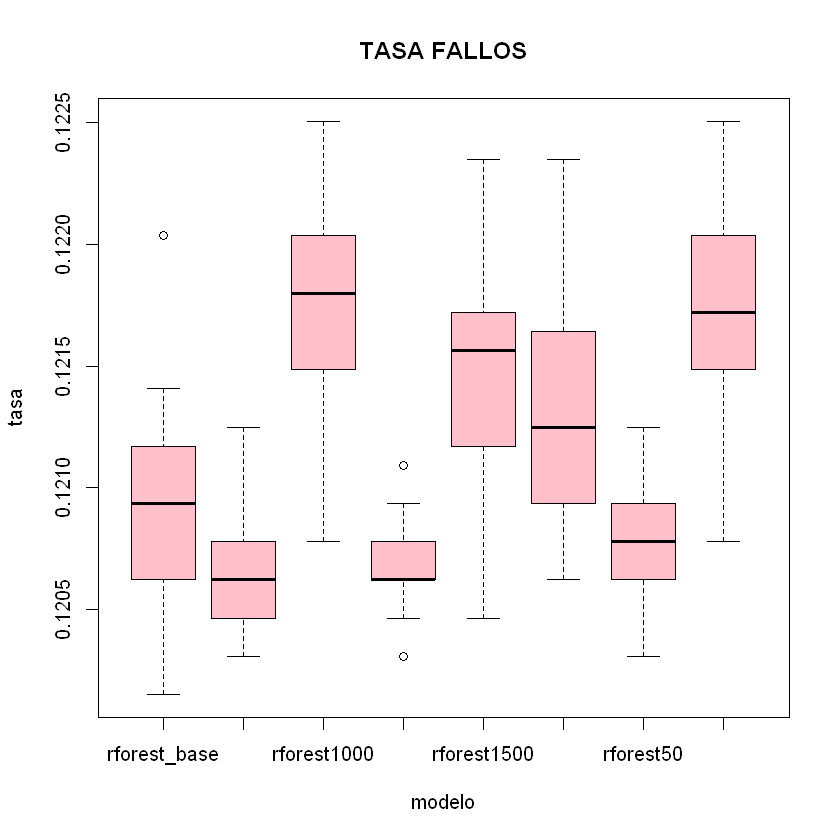

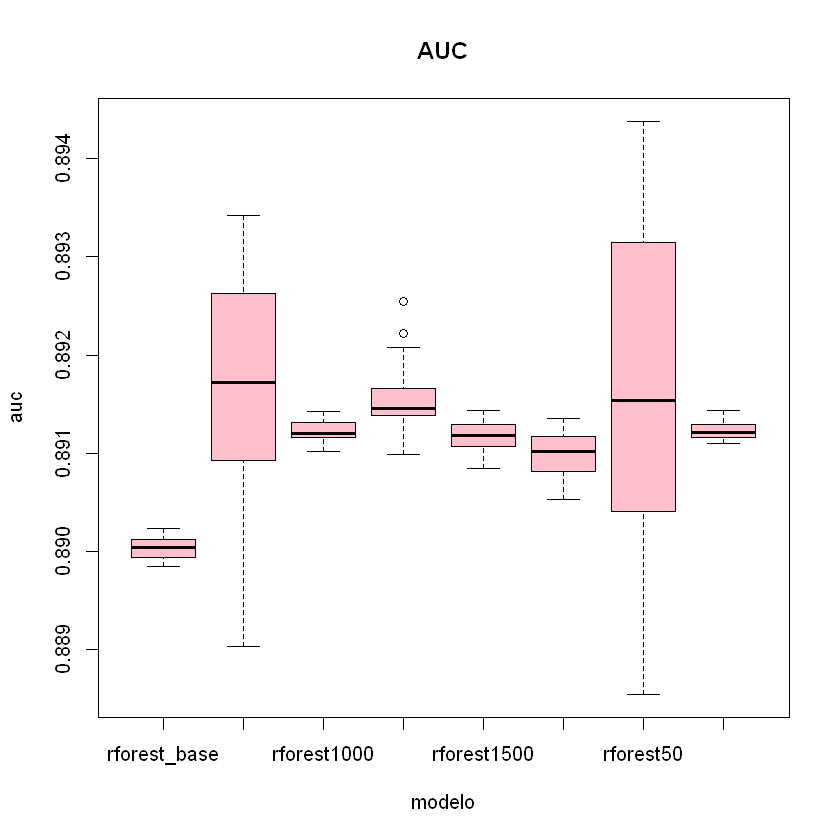

In [53]:
par(cex.axis=1.0)
boxplot(data=union21,tasa~modelo,main="TASA FALLOS",col="pink")
boxplot(data=union21,auc~modelo,main="AUC",col="pink")

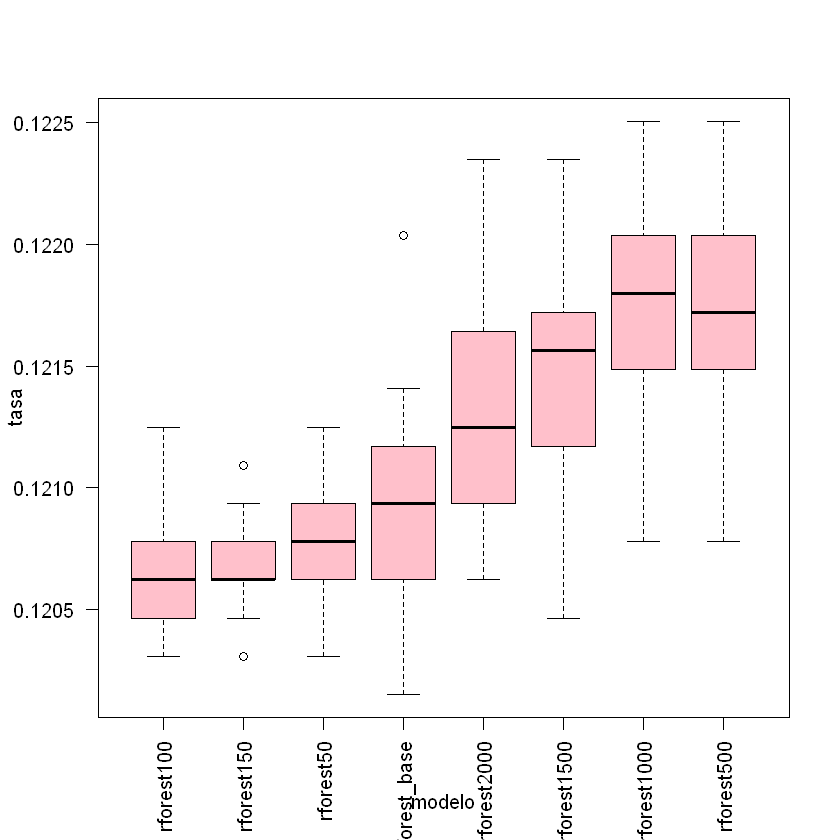

In [54]:
uni<-union21
uni$modelo<- with(uni, reorder(modelo,tasa,mean))
par(cex.axis=1, las=2)
boxplot(data=uni,tasa~modelo,col="pink")

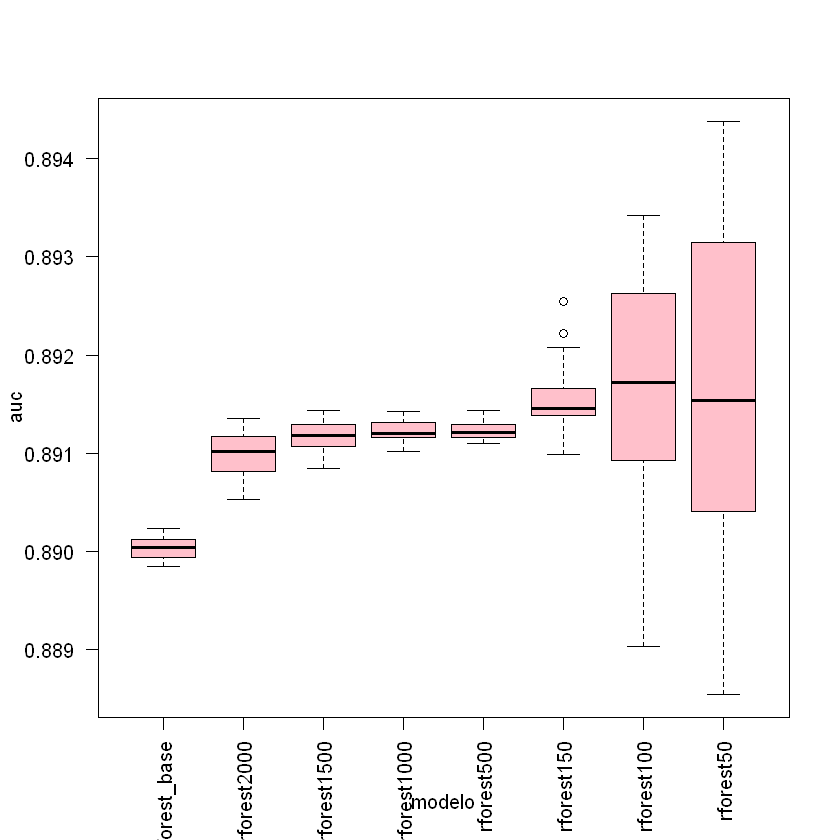

In [55]:
uni<-union21
uni$modelo<- with(uni, reorder(modelo,auc,mean))
par(cex.axis=1, las=2)
boxplot(data=uni,auc~modelo,col="pink")

A la vista de los resultados, se defiende que el valor de sampsize que mejor se ajusta a una variablidad contenida a la vez que un buen valor de AUC y bajo de tasa de fallos es el de 150. Ese es el parámetro que se va a usar. En el caso de bagging se a usado 100 pues a la vista de los resltados es el que más se ajustaba, pero en este caso se estima que el valor de 150 es más correcto.

### Comparación de modelos de los dos set de variables

In [6]:
medias1<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150)

  medias1$modelo="rforestsetbasico"


  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8794644 0.7504908 0.01110852 0.02352968


In [7]:
medias2<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y","highbp_nk","angina_nk","smstat_nk","stroke_y","stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=20,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150)

  medias2$modelo="rforestsetnuevo"


  mtry  Accuracy     Kappa AccuracySD    KappaSD
1    3 0.8793153 0.7501085 0.01095831 0.02323612


In [8]:
union4<-rbind(medias1,medias2)

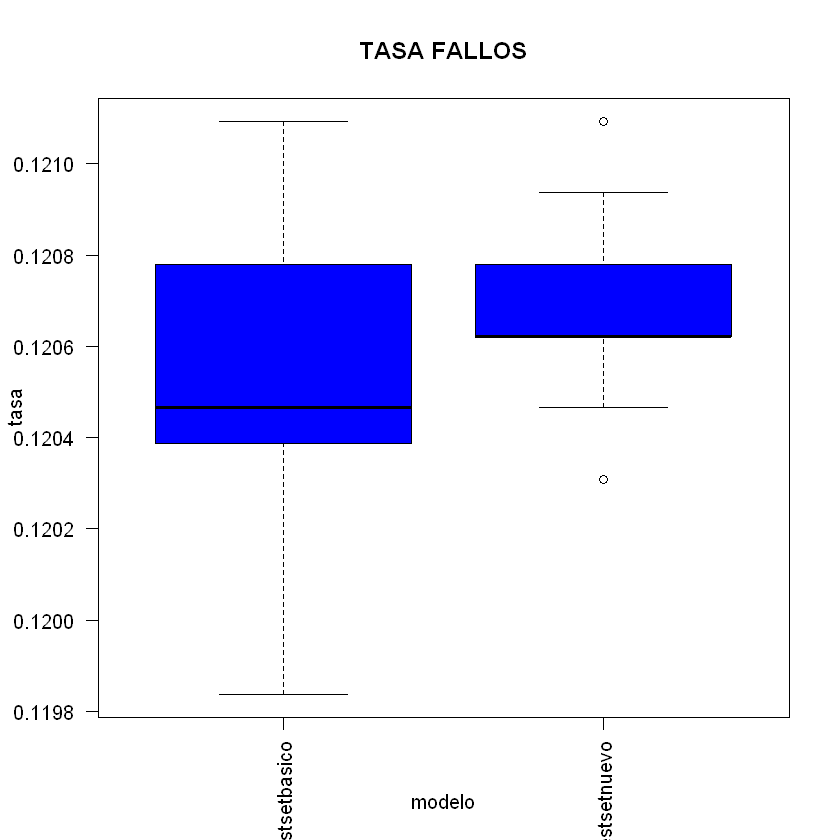

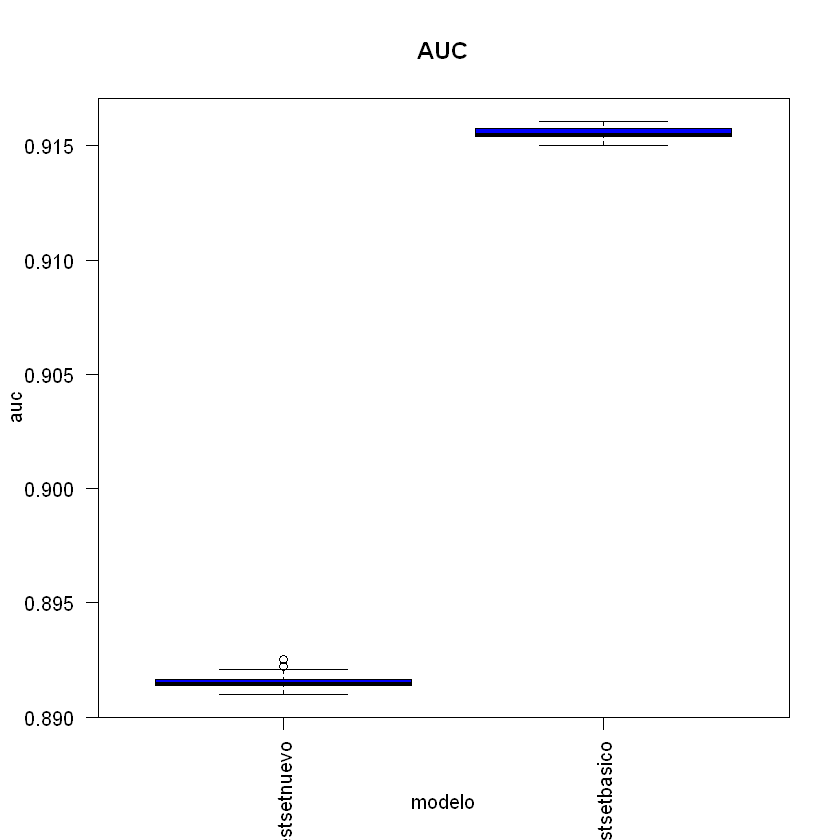

In [13]:
uni<-union4

uni$modelo <- with(uni,
 reorder(modelo,tasa, median))
par(cex.axis=1.0,las=2)
boxplot(data=uni,tasa~modelo,col="blue",main="TASA FALLOS")

uni<-union4
uni$modelo <- with(uni,
 reorder(modelo,auc, median))
par(cex.axis=1.0,las=2)
boxplot(data=uni,auc~modelo,col="blue",main="AUC")


El modelo de random forest que mejor resultado ha dado que queda comprobado que es el modelo correspondiente al set básico o clásico de 9 variables, con un mayor valor de AUC y menor tasa de fallos, aunque presente mayor variabilidad.Por lo que ese será el modelo seleccionado de random forest. Es el modelo correspondiente a medias 1, con los parámetros:
 
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150

### Comparación de modelos

In [7]:
#Mejor modelo de regresión logística (medias3 de EDA_NNET)
medias_1<-cruzadalogistica(data=data,
                    vardep=c("outcome"),
                    listconti=
c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                    listclass=c(""),
                    grupos=10,
                    sinicio=1234,
                    repe=100)


 medias_1$modelo="Logística"


In [ ]:
#mejor modelo de red neuronal(medias9 de EDA_NNET)
medias_2<-cruzadaavnnetbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=10,
                       sinicio=1234,
                       repe=25,
                       repeticiones=5,
                       itera=500,
                       size=c(5),
                       decay=c(0.001))

  medias_2$modelo="avnnet"

In [ ]:
  size decay   bag  Accuracy     Kappa AccuracySD    KappaSD
1    5 0.001 FALSE 0.8767774 0.7450545 0.01110455 0.02346587

In [9]:
#mejor modelo de árbol
medias_3<-cruzadaarbolbin(data=data,
                     vardep="outcome",
                     listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                     listclass=c(""),
                     grupos=10,
                     sinicio=1234,
                     repe=5,
                     cp=c(0),
                     minbucket =40)

medias_3$modelo="arbol"

  cp  Accuracy     Kappa AccuracySD    KappaSD
1  0 0.8720909 0.7362186 0.01168732 0.02436023


In [14]:
#mejor modelo de bagging
  medias_4<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=9,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=100)

  medias_4$modelo="bagging"


  mtry  Accuracy    Kappa  AccuracySD   KappaSD
1    9 0.8790632 0.749648 0.007291974 0.0154251


In [11]:
#mejor modelo Random Forest
medias_5<-cruzadarfbin(data=data,
                       vardep="outcome",
                       listconti=c("hosp_y", "highbp_nk", "age", "angina_nk", "angina_y", 
"smstat_nk", "yronset", "stroke_y", "stroke_nk"),
                       listclass=c(""),
                       grupos=4,
                       sinicio=1234,
                       repe=10,
                       nodesize=10,
                       mtry=3,
                       ntree=3000,
                       replace=TRUE,
                       sampsize=150)

  medias_5$modelo="rf"


  mtry  Accuracy     Kappa  AccuracySD   KappaSD
1    3 0.8794873 0.7504862 0.007499957 0.0158603


In [12]:
union3<-rbind(medias_1,medias_2,medias_3,medias_4,medias_5)

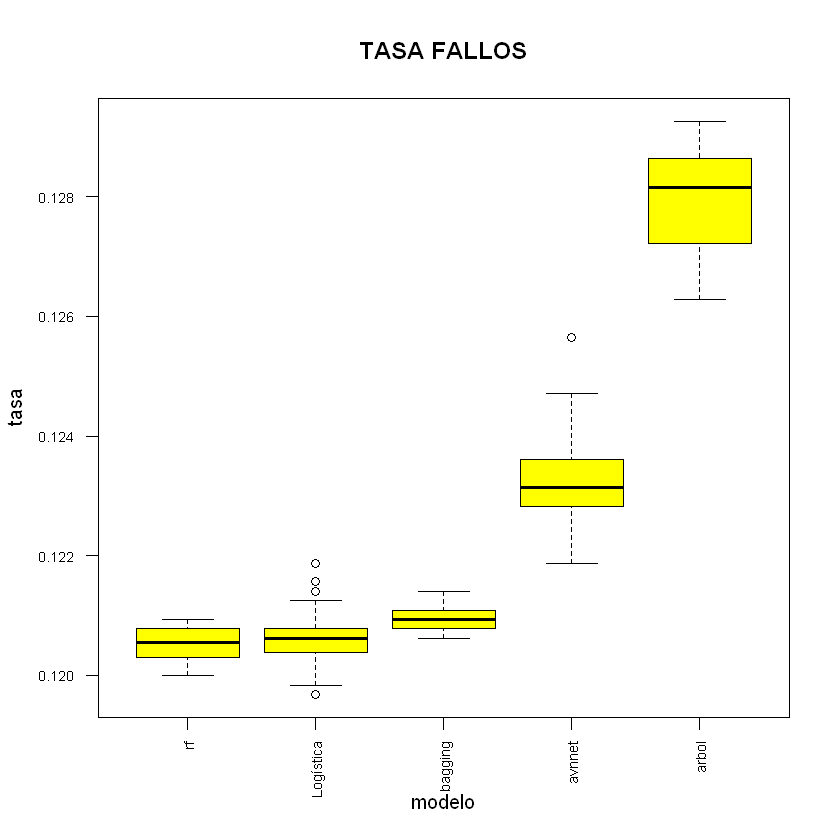

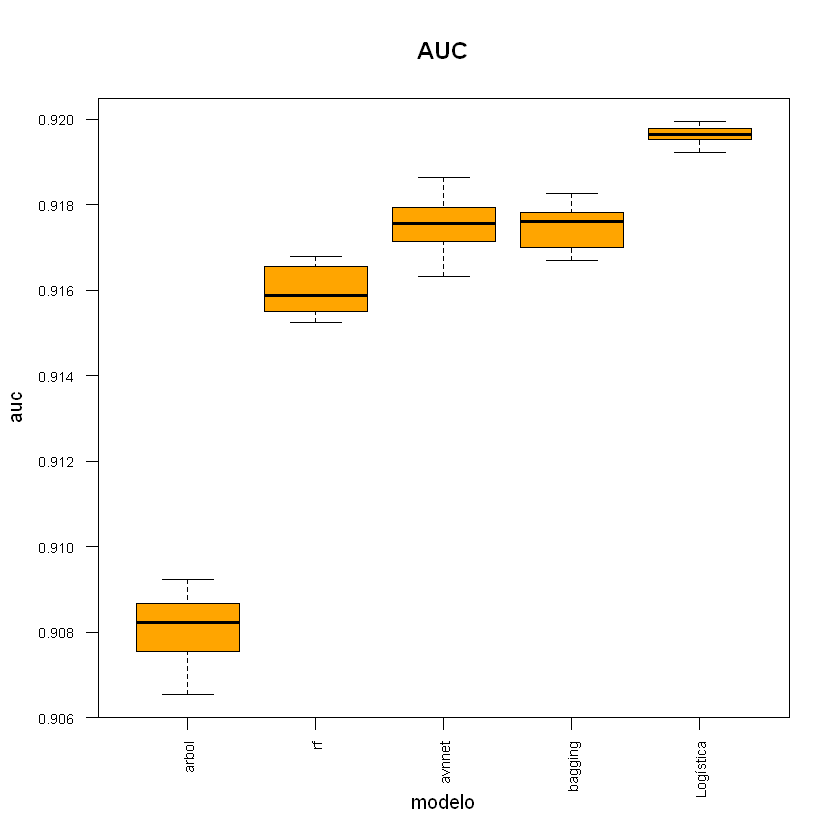

In [16]:
uni<-union3
uni$modelo <- with(uni,
 reorder(modelo,tasa, median))
par(cex.axis=0.7,las=2)
boxplot(data=uni,tasa~modelo,col="yellow",main="TASA FALLOS")

uni<-union3
uni$modelo <- with(uni,
 reorder(modelo,auc, median))
par(cex.axis=0.7,las=2)
boxplot(data=uni,auc~modelo,col="orange",main="AUC")


### Elección mejor modelo Random Forest

Tras la validación cruzada y boxplot de los diferentes algoritmos estudiados hasta la fecha, se aprecia que, aunque el algoritmo random forest es muy competitivo pues presenta una tsa de fallos mejor que ninguno, se queda con valores inferiores en AUC a la red neuronal, al bagging y sobretodo a la logística que vuelve a ser el modelo que mejor se comporta. es por ello que la Logística se mantiene como el mejor algoritmo de los estudiados hasta la fecha.